In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn
from circularcoordinates import weighted_circular_coordinate, weight_degree_sum_meta
from dataset import noisy_circle

In [2]:
_ = noisy_circle(True)
data, coord = [_[el] for el in ['data', 'coord']]
prime = 47

In [3]:
fts = [
    None,
    lambda x: 1 / np.sqrt(x), lambda x: 1 / x,
    lambda x: 1 / x ** 2, lambda x: 1 / x ** 4,
]
labels = [
    'Original',
    '$1/x^{0.5}$', '$1/x$',
    '$1/x^2$', '$1/x^4$',
]

In [4]:
results = np.mod(np.asarray([weighted_circular_coordinate(
    data,
    weight_degree_sum_meta(ft),
    prime=prime,
    order=0
) for ft in tqdm(fts)]), 1.0)

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


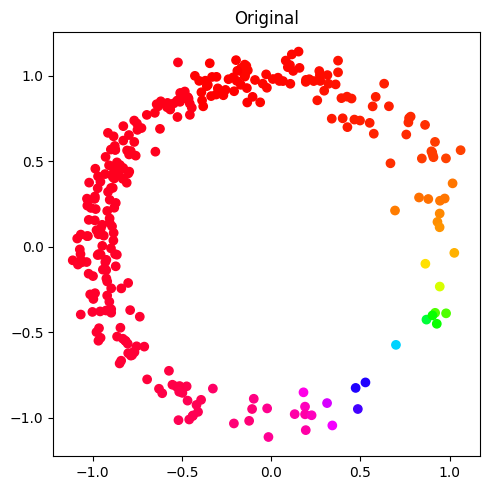

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(*data.T, c=results[0], cmap='hsv')
plt.title("Original")
plt.tight_layout()
plt.show()
plt.close()

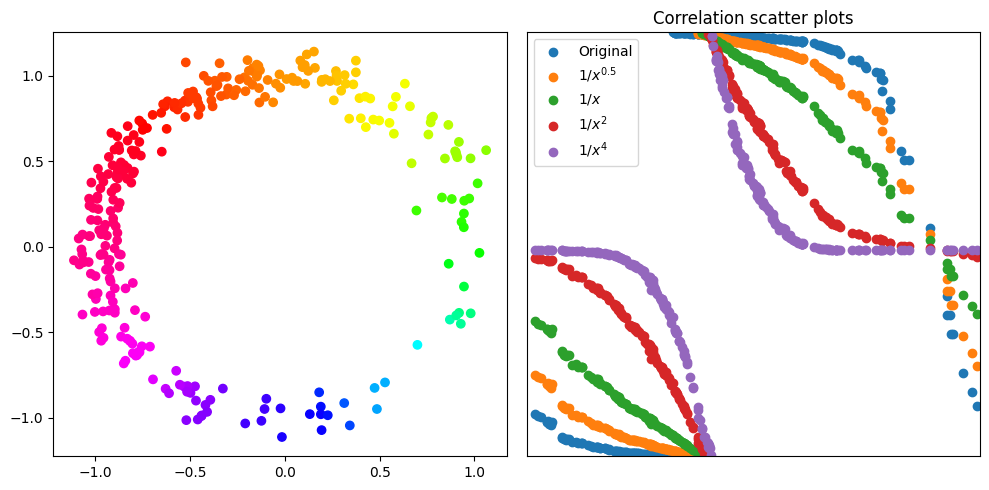

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(*data.T, c=results[2], cmap='hsv')
for result, label in zip(results, labels):
    axs[1].scatter(coord, result, label=label)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(0, 2 * np.pi)
axs[1].set_ylim(0, 1)
plt.legend()
axs[1].set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()

In [7]:
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
ccl.cc_original()
ccl.f_reset_L2()
hyper_params = [
    {'epoch': 20, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 6},
    {'epoch': 200, 'lr': 0.05, 'p_norm': 10},
    {'epoch': 500, 'lr': 0.05, 'p_norm': 20},
]
lp_results = []
for param in hyper_params:
    lp_results.append(ccl.cc_Lp(**param)[0])
lp_results.append(ccl.cc_Linf_Lp(3000, 0.0001, 0.001, 20, 25)[0])
lp_results = np.mod(np.asarray(lp_results), 1.0)

100%|██████████| 3000/3000 [00:27<00:00, 110.59it/s, 0.15318 / 0.15318 / p = infty]         


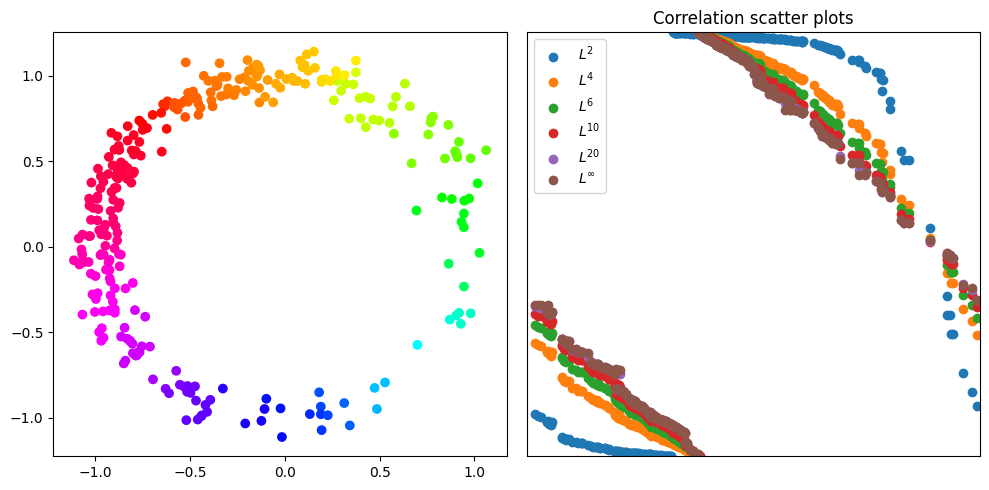

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(*data.T, c=lp_results[-1], cmap='hsv')
for result, label in zip(lp_results, [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[1].scatter(coord, result, label=f'$L^{label}$')
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlim(0, 2 * np.pi)
axs[1].set_ylim(0, 1)
plt.legend()
axs[1].set_title('Correlation scatter plots')
plt.tight_layout()
plt.show()
plt.close()